In [1]:
import numpy as np 
import os 
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 


In [2]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): 
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 8,
 '02_l': 0,
 '03_fist': 9,
 '04_fist_moved': 1,
 '05_thumb': 7,
 '06_index': 4,
 '07_ok': 6,
 '08_palm_moved': 5,
 '09_c': 2,
 '10_down': 3}

In [3]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('../input/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

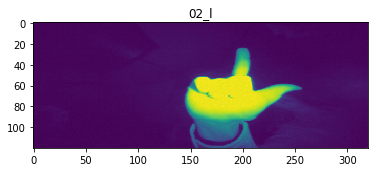

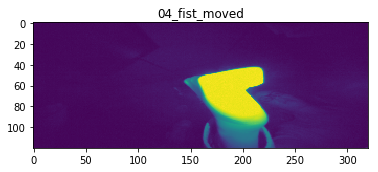

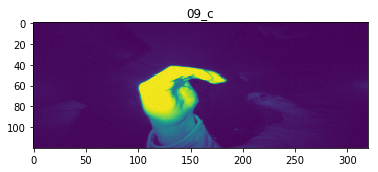

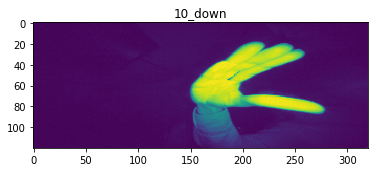

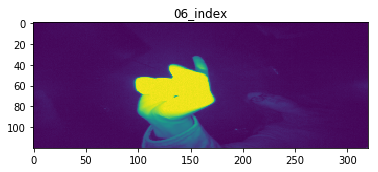

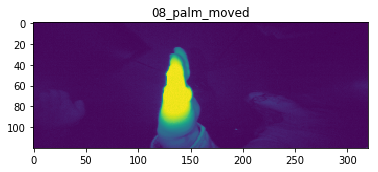

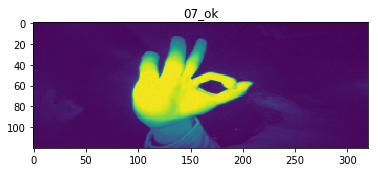

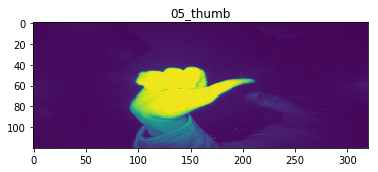

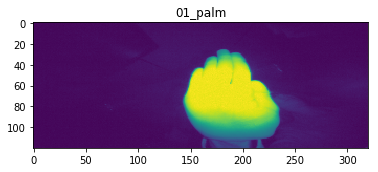

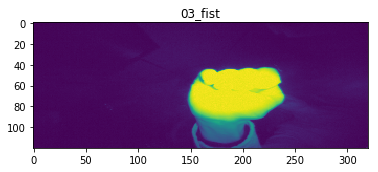

In [4]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()


In [5]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [8]:
from keras import layers
from keras import models

In [9]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Train on 16000 samples, validate on 2000 samples
Epoch 1/5
16000/16000 [==============================] - 253s 16ms/step - loss: 0.3091 - acc: 0.9047 - val_loss: 0.0046 - val_acc: 0.9990
Epoch 2/5
16000/16000 [==============================] - 252s 16ms/step - loss: 0.0154 - acc: 0.9958 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 3/5
16000/16000 [==============================] - 252s 16ms/step - loss: 0.0078 - acc: 0.9981 - val_loss: 3.9998e-04 - val_acc: 1.0000
Epoch 4/5
16000/16000 [==============================] - 252s 16ms/step - loss: 0.0077 - acc: 0.9982 - val_loss: 1.0018e-04 - val_acc: 1.0000
Epoch 5/5
16000/16000 [==============================] - 251s 16ms/step - loss: 0.0027 - acc: 0.9996 - val_loss: 2.6985e-06 - val_acc: 1.0000


In [11]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2000/2000 [==============================] - 12s 6ms/step
Accuracy:0.9985


### Saving Model and Model Weights

In [12]:
# Model weights and model
model.save_weights('gesture_model_weights.h5')
model.save("gesture_model.h5")

### Test 

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import image
import numpy as np

In [14]:

model.save('gesture_recognition_model.h5')


# model.save_weights('gesture_recognition_model_weights.h5')

In [15]:
from keras.models import load_model

loaded_model = load_model('gesture_recognition_model.h5')

#loaded_model.load_weights('gesture_recognition_model_weights.h5')

In [16]:
from keras.preprocessing import image
import numpy as np

In [17]:
t_test = []

datacount = 0 # We'll use this to tally how many images are in our dataset
folder_path = '/kaggle/input/test2-img/'

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
       
        img_path = os.path.join(folder_path, filename)
        count = 0 # To tally images of a given gesture

        
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((320, 120))
        arr = np.array(img)
        t_test.append(arr)
        count = count + 1
        
    datacount = datacount + count
t_test = np.array(t_test, dtype = 'float32')

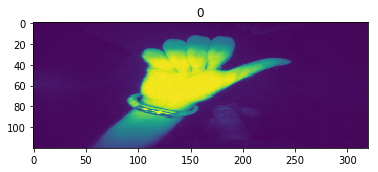

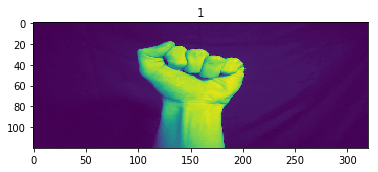

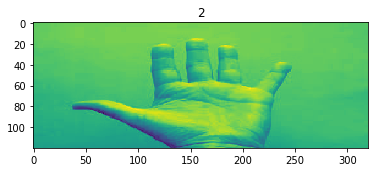

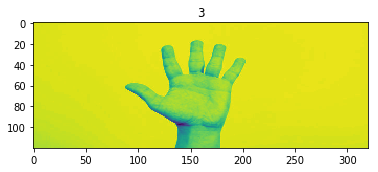

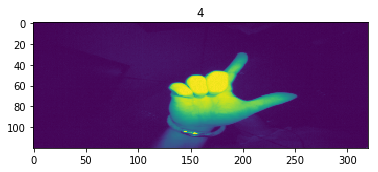

In [18]:
for i in range(0, 5):
    plt.imshow(t_test[i , :, :])
    plt.title(i)
    plt.show()

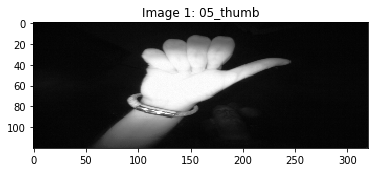

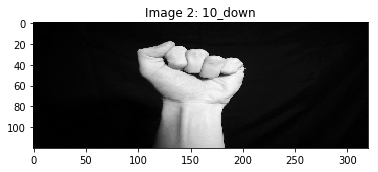

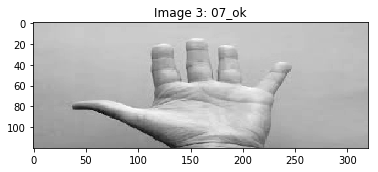

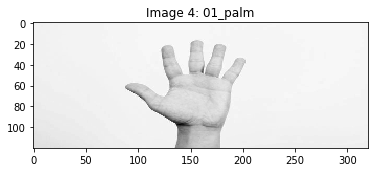

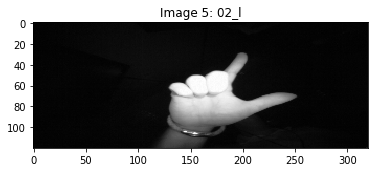

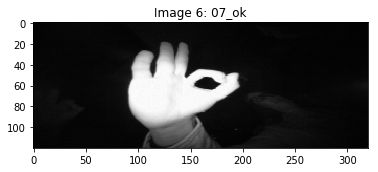

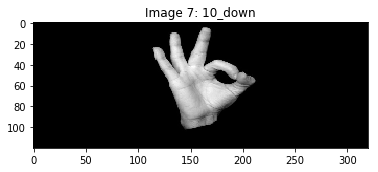

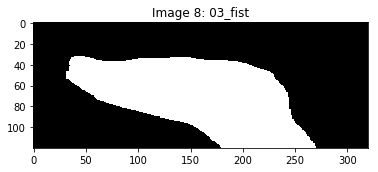

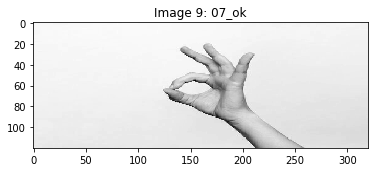

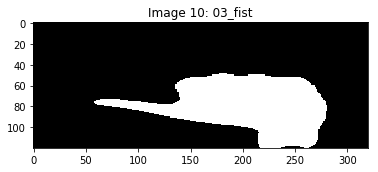

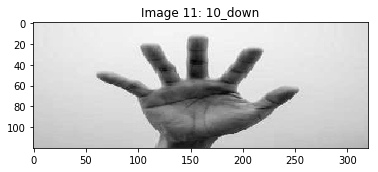

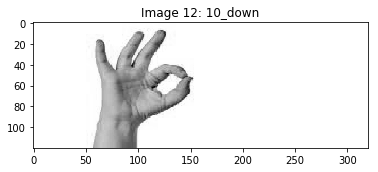

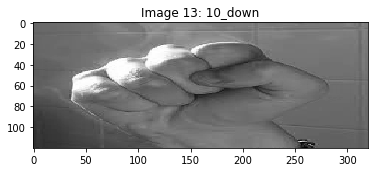

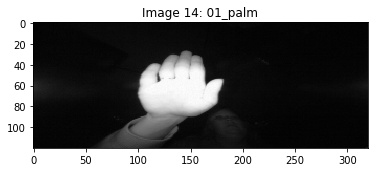

Predicted Gestures: ['05_thumb', '10_down', '07_ok', '01_palm', '02_l', '07_ok', '10_down', '03_fist', '07_ok', '03_fist', '10_down', '10_down', '10_down', '01_palm']


In [19]:

predicted_gestures = []

for i in range(t_test.shape[0]):
    img_show = t_test[i].reshape(120,320) 
    
    img2 = img_show.reshape(1, 120, 320, 1)  
    img2 /= 255.0  
    
    predictions = loaded_model.predict(img2)  
    predicted_class = np.argmax(predictions)
    predicted_gesture = reverselookup[predicted_class]
    predicted_gestures.append(predicted_gesture)
    
    plt.imshow(img_show, cmap='gray')  
    plt.title(f"Image {i + 1}: {predicted_gesture}")
    plt.show()

print("Predicted Gestures:", predicted_gestures)

Predicted Gestures: ['05_thumb', '10_down', '07_ok', '01_palm', '02_l', '07_ok', '10_down', '03_fist', '07_ok', '03_fist', '10_down', '10_down', '10_down', '01_palm']


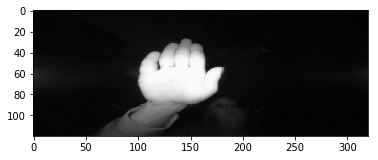

In [20]:
import matplotlib.pyplot as plt


folder_path = '/kaggle/input/test2-img/'


predicted_gestures = []


for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
       
        img_path = os.path.join(folder_path, filename)

       
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((320, 120))
        arr = np.array(img)
        t_test = arr.reshape((1, 120, 320, 1))
        t_test = t_test / 255.0
        plt.imshow(arr, cmap='gray')

     
        predictions = loaded_model.predict(t_test)


        predicted_class = np.argmax(predictions)
        predicted_gesture = reverselookup[predicted_class]
        predicted_gestures.append(predicted_gesture)


print("Predicted Gestures:", predicted_gestures)


In [21]:
x_data.size, y_data.size, t_test.view

(768000000, 200000, <function ndarray.view>)